In [8]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import preprocessing
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = np.loadtxt(open("./data.txt","r"))
x = data[:,0]
y = data[:,1]

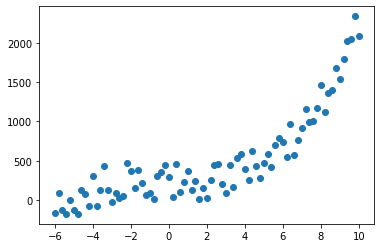

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("TRAIN :", x_train)
    print("TEST :", x_test)

TRAIN : [-4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6
 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2
  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.
  4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6  6.8
  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6
  9.8 10. ]
TEST : [-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4]
TRAIN : [-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -2.6 -2.4 -2.2 -2.  -1.8
 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.
  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8
  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6
  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4
  9.6  9.8 10. ]
TEST : [-4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8]
TRAIN : [-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4
 -3.2 -3.  -2.8 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8

In [14]:
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train, x_test = x_train.reshape(-1, 1) , x_test.reshape(-1, 1)
    std_scale = preprocessing.StandardScaler().fit(x_train)
    print("TRAIN :", std_scale.transform(x_train))
    print("TEST :", std_scale.transform(x_test))

TRAIN : [[-1.70815931]
 [-1.66004214]
 [-1.61192498]
 [-1.56380782]
 [-1.51569065]
 [-1.46757349]
 [-1.41945633]
 [-1.37133916]
 [-1.323222  ]
 [-1.27510484]
 [-1.22698767]
 [-1.17887051]
 [-1.13075334]
 [-1.08263618]
 [-1.03451902]
 [-0.98640185]
 [-0.93828469]
 [-0.89016753]
 [-0.84205036]
 [-0.7939332 ]
 [-0.74581604]
 [-0.69769887]
 [-0.64958171]
 [-0.60146454]
 [-0.55334738]
 [-0.50523022]
 [-0.45711305]
 [-0.40899589]
 [-0.36087873]
 [-0.31276156]
 [-0.2646444 ]
 [-0.21652724]
 [-0.16841007]
 [-0.12029291]
 [-0.07217575]
 [-0.02405858]
 [ 0.02405858]
 [ 0.07217575]
 [ 0.12029291]
 [ 0.16841007]
 [ 0.21652724]
 [ 0.2646444 ]
 [ 0.31276156]
 [ 0.36087873]
 [ 0.40899589]
 [ 0.45711305]
 [ 0.50523022]
 [ 0.55334738]
 [ 0.60146454]
 [ 0.64958171]
 [ 0.69769887]
 [ 0.74581604]
 [ 0.7939332 ]
 [ 0.84205036]
 [ 0.89016753]
 [ 0.93828469]
 [ 0.98640185]
 [ 1.03451902]
 [ 1.08263618]
 [ 1.13075334]
 [ 1.17887051]
 [ 1.22698767]
 [ 1.27510484]
 [ 1.323222  ]
 [ 1.37133916]
 [ 1.41945633]
 [